# FLIGHT TAKE OFF DATA
 This data is about flights leaving from JKF ariport between Nov 2019-Dec-2020.
 
 Taxi-Out prediction has been an important concept as it helps in calculating Runway time and directly impact the cost of the flight.
 
 About the Data
 
 1) Month = 1-12
 
 2) Day_of_month= 1-31
 
 3) Day_Of_Week= 1 (Monday) - 7 (Sunday)
 
 4) Dep_Time_M =actual departure time (local, hhmm)
  
 5) CRS_Dep_M =scheduled departure time (local, hhmm)
 
 6) sch_Arr =actual arrival time (local, hhmm)
 
 7) CRS_Arr_m= scheduled arrival time (local, hhmm)
 
 8) op_unique_Carrier= unique carrier code "B6" "DL" "AA" "AS" "MQ" "9E" "YX" "HA" "OO"
 
 9) Tail_Num =plane tail number
 
 10) Wind = Direction
 
 11) Wind speed = In num
 
 12) Tempratue =in celcius
 
 13) Pressure
 
 14) humidity
 
 15) Arr_Delay =Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in            minutes
 
 16) Dep_Delay =Difference in minutes between scheduled and actual departure time. Early departures show negative numbers, in        minutes
 
 17) Dest= destination IATA airport code
 
 18) Distance =Distance between airports (miles)
 
 19) TaxiOut(Y Dependent Var)= The time elapsed between departure from the origin airport gate and wheels off, in minutes
 

# PURPOSE OF THIS PROJECT
To test several models to predict Taxi_out time for JFK Airport.

Taxi_out is the time aircrafts spend on the surface. The period of time when the aircraft leave the tereminal and actually takes off.

Reducing the taxi_out time will help in cutting the consumption of fuel.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/flight-take-off-data-jfk-airport/M1_final.csv")
pd.set_option('display.max_column',None)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

(28820, 23)

In [4]:
df["Dew Point"] = df["Dew Point"].astype(int)
df = df.dropna()
df.corr()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007274,0.029366,0.046421,-0.016010,-0.000106,0.001732,0.002537,-0.012333,0.135832,0.135151,0.012522,-0.034989,-0.050989,-0.085342,-0.006131,-0.019737,0.018347
DAY_OF_MONTH,-0.007274,1.000000,-0.029732,-0.036634,0.002779,-0.002746,0.001717,0.004407,0.008533,-0.132428,-0.040094,0.096218,-0.093178,-0.088981,0.016845,-0.003392,0.002210,-0.024065
DAY_OF_WEEK,0.029366,-0.029732,1.000000,-0.006204,0.000413,0.002450,0.005412,0.008258,-0.003340,0.013082,-0.073823,0.001627,0.095956,0.127689,0.102294,0.024416,0.009622,0.028397
DEP_DELAY,0.046421,-0.036634,-0.006204,1.000000,-0.030862,-0.031501,0.102330,0.072275,0.043827,-0.032169,0.000062,-0.011771,0.067819,0.044363,-0.064993,-0.065409,-0.006974,0.034759
CRS_ELAPSED_TIME,-0.016010,0.002779,0.000413,-0.030862,1.000000,0.994465,-0.031249,-0.021306,0.035227,-0.016166,0.007161,0.017192,-0.013545,-0.011959,0.010223,0.083376,-0.067643,0.071007
DISTANCE,-0.000106,-0.002746,0.002450,-0.031501,0.994465,1.000000,-0.040889,-0.034529,0.008561,-0.010026,0.009712,0.015105,-0.010828,-0.009544,0.005744,0.059129,-0.088771,0.060006
CRS_DEP_M,0.001732,0.001717,0.005412,0.102330,-0.031249,-0.040889,1.000000,0.946014,0.452628,0.086636,0.001763,0.003857,0.008286,-0.009836,-0.008409,-0.025506,0.495274,0.044562
DEP_TIME_M,0.002537,0.004407,0.008258,0.072275,-0.021306,-0.034529,0.946014,1.000000,0.469934,0.098385,0.009103,-0.005910,0.006265,-0.014284,-0.009541,0.025737,0.544192,0.057584
CRS_ARR_M,-0.012333,0.008533,-0.003340,0.043827,0.035227,0.008561,0.452628,0.469934,1.000000,0.101572,-0.000503,-0.033172,0.014111,0.004470,-0.012644,0.149893,0.424299,0.071524
Temperature,0.135832,-0.132428,0.013082,-0.032169,-0.016166,-0.010026,0.086636,0.098385,0.101572,1.000000,0.787818,0.054392,0.010308,-0.039564,-0.376641,-0.022699,0.076055,-0.067171


<AxesSubplot:title={'center':'Correlation of features with TAXI_OUT'}>

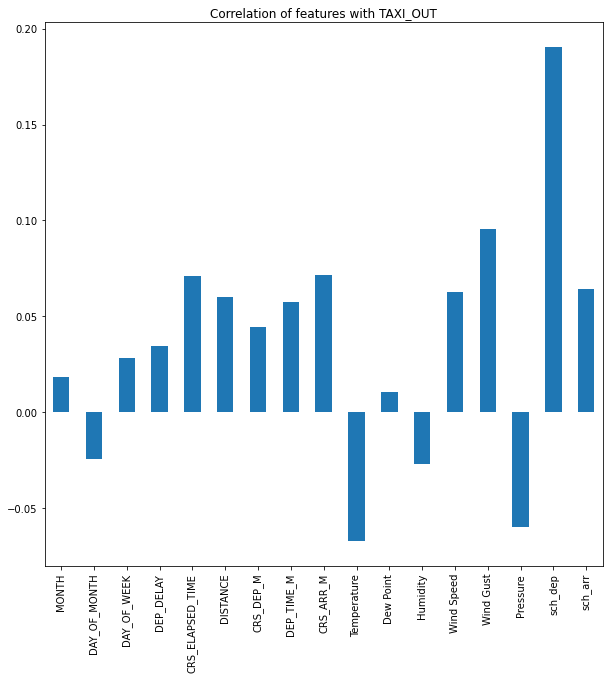

In [5]:
plt.figure(figsize = (10, 10))
df.corr().iloc[:-1, -1].plot(kind = "bar", title = "Correlation of features with TAXI_OUT")

# Label Encoding

In [6]:
df1 = df[:]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['OP_UNIQUE_CARRIER']=le.fit_transform(df['OP_UNIQUE_CARRIER'])
df['TAIL_NUM']=le.fit_transform(df['TAIL_NUM'])
df['DEST']=le.fit_transform(df['DEST'])
df['Wind']=le.fit_transform(df['Wind'])
df['Condition']=le.fit_transform(df['Condition'])

df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,323,448,48,34,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,333,531,48,34,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,341,482,48,34,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,343,513,48,34,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,356,499,46,32,58,15,24,35,29.91,4,9,17,13


**Train - Test Split**

In [7]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(28818, 22) (28818,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

e1 = [] #array to store the RMSE

(25936, 22) (2882, 22) (25936,) (2882,)


**Linear Regression**

In [9]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error as mse

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
p = lr.predict(X_test)
e1.append(mse(y_test, p)**0.5)
print("RMSE:", e1[0])

RMSE: 6.525649938271358


**Ridge Regression**

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
p1 = ridge.predict(X_test)
e1.append(mse(y_test, p1, squared = False))
print("RMSE:",e1[1])

RMSE: 6.52565109000236


**Lasso regression**

In [12]:
from sklearn.linear_model import Lasso

la = Lasso(alpha = 0.1)
la.fit(X_train, y_train)
p2 = la.predict(X_test)
e1.append(mse(y_test, p2, squared = False))
print("RMSE:",e1[2])

RMSE: 6.529133634456442


**KNN Neighbors Model**

In [13]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=200)
knn.fit(X_train,y_train)
p3=knn.predict(X_test)
e1.append(mse(y_test, p3, squared = False))
print("RMSE:",e1[3])

RMSE: 6.661849338323649


**Support Vector Regression**

In [14]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
p4 = svr.predict(X_test)
e1.append(mse(y_test, p4, squared = False))
print("RMSE:",e1[4])

RMSE: 6.799030342531523


**Naive Bayes**

In [15]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br.fit(X_train, y_train)
p5 = br.predict(X_test)
e1.append(mse(y_test, p5, squared = False))
print("RMSE:",e1[5])

RMSE: 6.52944590836202


**Random Forest**

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
p6 = rfr.predict(X_test)
e1.append(mse(y_test, p6, squared = False))
print("RMSE:",e1[6])

RMSE: 5.7213126214551435


**LightGBM**

In [17]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
p7 = lgbm.predict(X_test)
e1.append(mse(y_test, p7, squared = False))
print("RMSE:",e1[7])

RMSE: 5.712861904665279


# One Hot Encoding

In [18]:
df = df1[:]
df = pd.get_dummies(df, columns = ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Wind', 'Condition'])
df.head()

MONTH  DAY_OF_MONTH  DAY_OF_WEEK  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  \
0     11             1            5         -1               124       636   
1     11             1            5         -7               371      2475   
2     11             1            5         40               181      1069   
3     11             1            5         -2               168       944   
4     11             1            5         -4               139       760   

   CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  Temperature  Dew Point  Humidity  \
0        324         323        448           48         34        58   
1        340         333        531           48         34        58   
2        301         341        482           48         34        58   
3        345         343        513           48         34        58   
4        360         356        499           46         32        58   

   Wind Speed  Wind Gust  Pressure  sch_dep  sch_arr  TAXI_OUT  \
0          25         38     29.86        9       17        14   
1          25         38     29.86        9       17        15   
2          25         38     29.86        9       17        22   
3          25         38     29.86        9       17        12   
4          24         35     29.91        9       17        13   

   OP_UNIQUE_CARRIER_9E  OP_UNIQUE_CARRIER_AA  OP_UNIQUE_CARRIER_AS  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   OP_UNIQUE_CARRIER_B6  OP_UNIQUE_CARRIER_DL  OP_UNIQUE_CARRIER_HA  \
0                     1                     0                     0   
1                     1                     0                     0   
2                     1                     0                     0   
3                     1                     0                     0   
4                     0                     1                     0   

   OP_UNIQUE_CARRIER_MQ  OP_UNIQUE_CARRIER_OO  OP_UNIQUE_CARRIER_YX  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   TAIL_NUM_N101DU  TAIL_NUM_N101HQ  TAIL_NUM_N101NN  TAIL_NUM_N102DU  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   TAIL_NUM_N102HQ  TAIL_NUM_N102NN  TAIL_NUM_N103DU  TAIL_NUM_N103HQ  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   TAIL_NUM_N103NN  TAIL_NUM_N104DU  TAIL_NUM_N104HQ  TAIL_NUM_N104NN  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   TAIL_NUM_N105DU  TAIL_NUM_N105HQ  TAIL_NUM_N105NN  TAIL_NUM_N105UW  \
0                0         

In [19]:
df.shape

(28818, 2227)

**Train - Test Split**

In [20]:
X, y = df.drop(["TAXI_OUT"], axis = 1), df["TAXI_OUT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

e2 = [] #array to store the RMSE

(25936, 2226) (2882, 2226) (25936,) (2882,)


**Linear Regression**

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
q = lr.predict(X_test)
e2.append(mse(y_test, q, squared = False))
print("RMSE:", e2[0])

RMSE: 6.614100256070185


**Ridge Regression**

In [22]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
p1 = ridge.predict(X_test)
e2.append(mse(y_test, p1, squared = False))
print("RMSE:",e2[1])

RMSE: 6.512844284655421


**Lasso regression**

In [23]:
la = Lasso(alpha = 0.1)
la.fit(X_train, y_train)
p2 = la.predict(X_test)
e2.append(mse(y_test, p2, squared = False))
print("RMSE:",e2[2])

RMSE: 6.502136551468948


**kNN Neighbors Model**

In [24]:
knn=KNeighborsRegressor(n_neighbors=200)
knn.fit(X_train,y_train)
p3=knn.predict(X_test)
e2.append(mse(y_test, p3, squared = False))
print("RMSE:",e2[3])

RMSE: 6.643181957187995


**Support Vector Regression**

In [25]:
svr = SVR()
svr.fit(X_train, y_train)
p4 = svr.predict(X_test)
e2.append(mse(y_test, p4, squared = False))
print("RMSE:",e2[4])

RMSE: 6.8136884135127795


**Naive Bayes**

In [26]:
br = BayesianRidge()
br.fit(X_train, y_train)
p5 = br.predict(X_test)
e2.append(mse(y_test, p5, squared = False))
print("RMSE:",e2[5])

RMSE: 6.343012802209872


**Random Forest**

In [27]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
p6 = rfr.predict(X_test)
e2.append(mse(y_test, p6, squared = False))
print("RMSE:",e2[6])

RMSE: 5.639812257864227


**LightGBM**

In [28]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
p7 = lgbm.predict(X_test)
e2.append(mse(y_test, p7, squared = False))
print("RMSE:",e2[7])

RMSE: 5.761650397571612


# Evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

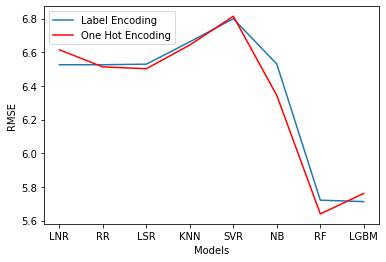

In [29]:
algo = ["LNR", "RR", "LSR", "KNN", "SVR", "NB", "RF", "LGBM"]

plt.plot(algo, e1)
plt.plot(algo, e2, 'r')

plt.legend(["Label Encoding","One Hot Encoding"])

plt.xlabel("Models")
plt.ylabel("RMSE")

plt.show

LNR : Linear Regression<br>
RR  : Ridge Regression<br>
LSR : Lasso Regression<br>
KNN : KNN Neighbors Model<br>
SVR : Support Vector Regression<br>
NB  : Naive Bayes<br>
RF  : Random Forest<br>
LGBM: LightGBM


Clearly, we can see that One Hot Encoding improves the accuracy of the training models.And found Random Forest Regressor with One-Hot Encoding performed better than other models.